In [38]:
# Assigment 2
# 

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(1, len(arr)):
        dub[i] = dub[i - 1] + alp * (dub[i] - dub[i - 1])
    return dub

In [40]:
def mean_smooth(wind, arr):
    dub = np.array(arr)
    for i in range((wind -1) // 2 , len(dub) - (wind - 1) // 2):
        dub[i] = np.mean(dub[i - (wind - 1) // 2 : i + (wind - 1) // 2])
    return dub

In [41]:
x0 = 10 #initial condition

var1 = 13 #variance
sigma1 = 13 ** 0.5 #standard 

x1 = np.ones(300)
x2 = np.ones(3000)

# genration of normal noise
w1 = np.random.normal(0, sigma1, 300)
w2 = np.random.normal(0, sigma1, 3000)


x1[0] = x0 + w1[0]
for i in range(1,300):
    x1[i] = x1[i - 1] + w1[i]

x2[0] = x0 + w2[0]
for i in range(1,3000):
    x2[i] = x2[i - 1] + w2[i]
    

In [42]:
var2 = 8
sigma2 = var2 ** 0.5

eta1 = np.random.normal(0, sigma2, 300)
eta2 = np.random.normal(0, sigma2, 3000)

z1 = np.ones(300)
z2 = np.ones(3000)

z1[0] = x1[0] + eta1[0]
for i in range(1,300):
    z1[i] = z1[i - 1] + eta1[i]

z2[0] = x2[0] + eta2[0]
for i in range(1,3000):
    z2[i] = z2[i - 1] + eta2[i]

In [43]:
v1 = np.zeros(300)
v2 = np.zeros(3000)

ro1 = np.zeros(300)
ro2 = np.zeros(3000)

for i in range(1,300):
    v1[i] = w1[i] + eta1[i] - eta1[i - 1]
for i in range(2,300):
    ro1[i] = w1[i] + w1[i - 1] + eta1[i] - eta1[i - 2]

for i in range(1,3000):
    v2[i] = w2[i] + eta2[i] - eta2[i - 1]
for i in range(2,3000):
    ro2[i] = w2[i] + w2[i - 1] + eta2[i] - eta2[i - 2]

In [44]:
Ev1 = np.std(v1[1:len(v1) - 1]) ** 2
Ero1 = np.std(ro1[2:len(ro1) - 1]) ** 2

Ev2 = np.std(v2[1:len(v2) - 1]) ** 2
Ero2 = np.std(ro2[1:len(ro2) - 1]) ** 2

In [45]:
E1 = np.array([Ev1, Ero1])
E2 = np.array([Ev2, Ero2])

In [46]:
coefs = (np.array([[1, 2], [2, 2]]))

sigma1_2 = np.dot(np.linalg.inv(coefs), E1) # calculating column of sigma squared for 300 points
sigma2_2 = np.dot(np.linalg.inv(coefs), E2) # calculating column of sigma squared for 3000 points

sigma = np.array([sigma1_2, sigma2_2])
sigma1_2 = sigma[:, 0] # variance for process noise for both 300 and 3000 points
sigma2_2 = sigma[:, 1] # variance for measurement noise both 300 and 3000 points

In [47]:
print(sigma1_2)
print(sigma2_2)

[8.5269719  8.25066771]
[-0.23586986 -0.23066344]


In [12]:
est_var1 = abs((sigma1 - sigma1_2 ** 0.5) / sigma1) * 100 
est_var2 = abs((sigma2 - sigma2_2 ** 0.5) / sigma2) * 100

In [13]:
# comparision of differences between calculated and given sigmas
print(est_var1)
print(est_var2)

[0.10459842 5.18613322]
[7.10442101 5.43488195]


In [14]:
hi1 = sigma1_2[0] / sigma2_2[0]
hi2 = sigma1_2[1] / sigma2_2[1]

alp1 = (-hi1 + np.sqrt(hi1 ** 2 + 4 * hi1)) / 2
alp2 = (-hi2 + np.sqrt(hi2 ** 2 + 4 * hi2)) / 2

Text(0.5, 1.0, 'Monthly mean sunspot number and solar radio flux F10.7 cm')

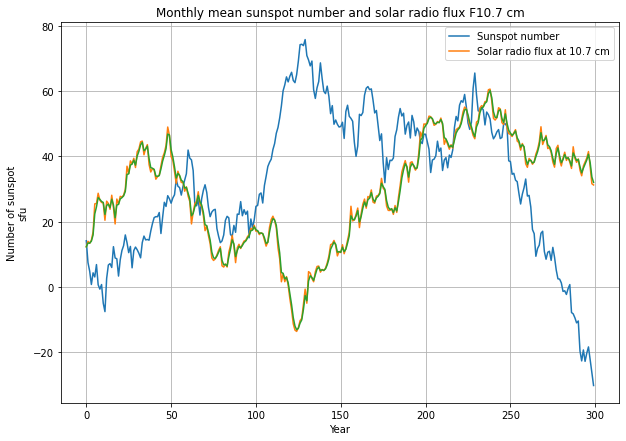

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(x1)
plt.plot(z1)
plt.plot(exp_smooth(alp1, z1))
plt.grid()
plt.ylabel('Number of sunspot\nsfu')
plt.xlabel('Year')
plt.legend(['Sunspot number', 'Solar radio flux at 10.7 cm'])
plt.title('Monthly mean sunspot number and solar radio flux F10.7 cm')

Text(0.5, 1.0, 'Monthly mean sunspot number and solar radio flux F10.7 cm')

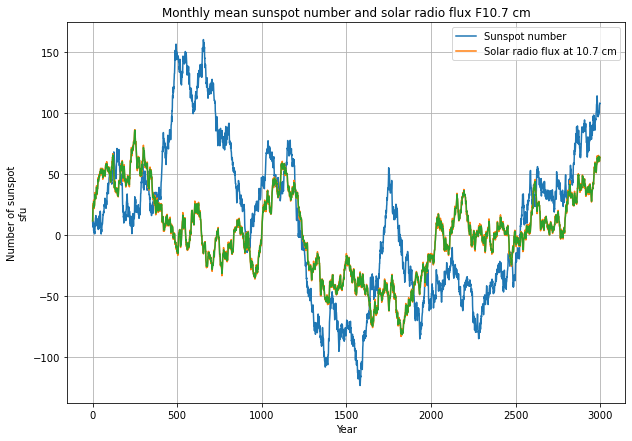

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(x2)
plt.plot(z2)
plt.plot(exp_smooth(alp2, z2))
plt.grid()
plt.ylabel('Number of sunspot\nsfu')
plt.xlabel('Year')
plt.legend(['Sunspot number', 'Solar radio flux at 10.7 cm'])
plt.title('Monthly mean sunspot number and solar radio flux F10.7 cm')

In [17]:
print(alp1, alp2)

0.6763736799676914 0.664242828365785


In [18]:
# PART 2 
x0 = 10 #initial condition

sigmaw_2 = 28 ** 2

x = np.ones(300)

# genration of normal noise
w = np.random.normal(0, sigmaw_2 ** 0.5, 300)

x[0] = x0 + w[0]
for i in range(1,300):
    x[i] = x[i - 1] + w[i]

sigmaeta_2 = 97 ** 2

z = np.ones(300)

eta = np.random.normal(0, sigmaeta_2 ** 0.5, 300)

z[0] = x[0] + eta[0]
for i in range(1,300):
    z[i] = z[i - 1] + eta[i]


    

In [19]:
hi = sigmaw_2 / sigmaeta_2
alp = (-hi + np.sqrt(hi ** 2 + 4 * hi)) / 2
M = round((2 - alp) / alp)
print(alp)
print(M)

0.24998861233121078
7


Text(0.5, 1.0, 'Monthly mean sunspot number and solar radio flux F10.7 cm')

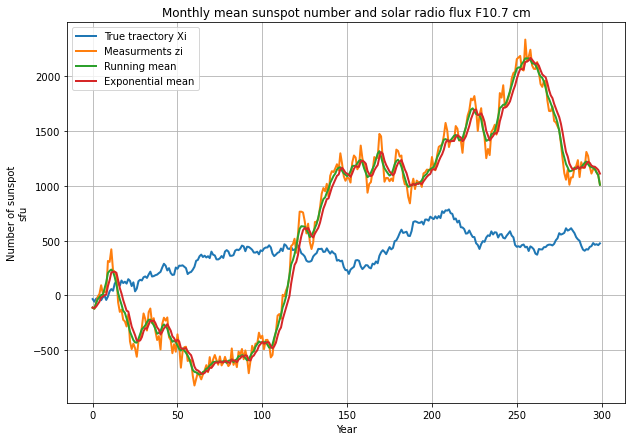

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(x, linewidth = 2)
plt.plot(z, linewidth = 2)
plt.plot(mean_smooth(M, z), linewidth = 2)
plt.plot(exp_smooth(alp, z), linewidth = 2)
plt.grid()
plt.ylabel('Number of sunspot\nsfu')
plt.xlabel('Year')
plt.legend(['True traectory Xi', 'Measurments zi', 'Running mean', 'Exponential mean'])
plt.title('Monthly mean sunspot number and solar radio flux F10.7 cm')

In [22]:
print(np.std(z - mean_smooth(M, z)))
print(np.std(z - exp_smooth(alp, z)))

71.81196384598007
109.08122134424346


In [ ]:
def 